In [81]:
import pandas as pd
from datetime import datetime
import glob
import os
import math
from IPython.display import display
from IPython.display import display, HTML


# To be able to read XLS files
# pip install xlrd

## Interactive tables



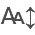

In [82]:
# pip install itables
from itables import init_notebook_mode

init_notebook_mode(all_interactive=True)
from itables import show
# show(df, maxBytes=0)

# Showing index
import itables.options as opt
opt.showIndex = True

# Turning off downsampling of data while printing it
import itables.options as opt
opt.maxBytes = 0

In [83]:
path_qgis = r'C:\Users\muij\OneDrive - Norwegian University of Life Sciences\Documents\+Combining ALL DATA with Agro\PhenoCrop 2023'

In [84]:
path_agro = r'C:\Users\muij\OneDrive - Norwegian University of Life Sciences\Documents\+Combining ALL DATA with Agro\PhenoCrop 2023\AGRO DATA 2023'

In [85]:
all_files_qgis = glob.glob(path_qgis + "/*.xlsx")
# all_files_qgis

In [86]:
# Importing all the datasets except those from Mavic3RGB images since we need the Multispectral data only

list_df_names = []
for filepath in all_files_qgis:
    if not("M3RGB") in filepath:
        file_name=os.path.basename(filepath[:-5]).replace('-','_')
        list_df_names.append(file_name)
        
        # print(filepath,os.path.basename(filepath[:-5]))
        locals()[file_name] = pd.read_excel(filepath, index_col=None, header=0)
        print(file_name, '=====', locals()[file_name].shape)

phenocrop_2023_P4M_20m_20230623 ===== (760, 19)
phenocrop_2023_P4M_20m_20230628 ===== (760, 19)
phenocrop_2023_P4M_20m_20230708 ===== (760, 28)
phenocrop_2023_P4M_20m_20230714 ===== (760, 16)
phenocrop_2023_P4M_20m_20230719 ===== (760, 19)
phenocrop_2023_P4M_20m_20230727 ===== (760, 19)
phenocrop_M3MS_20m_20230614 ===== (760, 16)
Phenocrop_M3MS_20m_20230622 ===== (760, 16)
phenocrop_M3MS_20m_20230628 ===== (760, 16)
phenocrop_M3MS_20m_20230708 ===== (760, 16)
phenocrop_M3MS_20m_20230714 ===== (760, 16)


In [87]:
# Since one dataset has more than 19 columns,
# and after checking them manually it was found that the ones after the 19th columns are not relevant,
# keeping only the first 19 columns here.

for dfs in list_df_names:
    # print(dfs, locals()[dfs].shape)
    locals()[dfs] = locals()[dfs].iloc[:,:19]
    print(dfs, locals()[dfs].shape)

phenocrop_2023_P4M_20m_20230623 (760, 19)
phenocrop_2023_P4M_20m_20230628 (760, 19)
phenocrop_2023_P4M_20m_20230708 (760, 19)
phenocrop_2023_P4M_20m_20230714 (760, 16)
phenocrop_2023_P4M_20m_20230719 (760, 19)
phenocrop_2023_P4M_20m_20230727 (760, 19)
phenocrop_M3MS_20m_20230614 (760, 16)
Phenocrop_M3MS_20m_20230622 (760, 16)
phenocrop_M3MS_20m_20230628 (760, 16)
phenocrop_M3MS_20m_20230708 (760, 16)
phenocrop_M3MS_20m_20230714 (760, 16)


# One dataset has blue values missing. Will have to fix that processing in QGIS later. Right now moving forward with the missing values.

# Adding date column

In [101]:
# Adding respective date column in each dataset
for dfs in list_df_names:

    date_from_dfs_name = dfs[-8:]
    # Converting date str to datetime object
    date_obj = datetime.strptime(date_from_dfs_name, '%Y%m%d')
    # Converting datetime obj to formatted date str
    date_str = date_obj.strftime('%m-%d-%Y')

    # Adding a column with formatted date in the dataset
    locals()[dfs]["date"]= date_str
    print(dfs, locals()[dfs].shape)

phenocrop_2023_P4M_20m_20230623 (760, 20)
phenocrop_2023_P4M_20m_20230628 (760, 20)
phenocrop_2023_P4M_20m_20230708 (760, 20)
phenocrop_2023_P4M_20m_20230714 (760, 17)
phenocrop_2023_P4M_20m_20230719 (760, 20)
phenocrop_2023_P4M_20m_20230727 (760, 20)
phenocrop_M3MS_20m_20230614 (760, 17)
Phenocrop_M3MS_20m_20230622 (760, 17)
phenocrop_M3MS_20m_20230628 (760, 17)
phenocrop_M3MS_20m_20230708 (760, 17)
phenocrop_M3MS_20m_20230714 (760, 17)


In [102]:
# Creating a list of column headings, sorted
cols = sorted(phenocrop_2023_P4M_20m_20230719.columns.tolist())

# Repositioning the ID Column
old_index = cols.index('id')
cols.insert(0, cols.pop(old_index))
cols

['id',
 'blue_mean',
 'blue_median',
 'blue_stdev',
 'date',
 'green_mean',
 'green_median',
 'green_stdev',
 'ndvi_mean',
 'ndvi_median',
 'ndvi_stdev',
 'nir_mean',
 'nir_median',
 'nir_stdev',
 'red_edge_mean',
 'red_edge_median',
 'red_edge_stdev',
 'red_mean',
 'red_median',
 'red_stdev']

In [103]:
blue_list = []
for x in cols:
    if 'blue' in x:
        blue_list.append(x)
    if 'date' in x:
        blue_list.append(x)

        # index_now = cols.index(x)
        # cols.insert(len(cols), cols.pop(index_now))
        # print(cols)
        # print('sd')

In [105]:
append_list_sorted =sorted(blue_list)
append_list_sorted

['blue_mean', 'blue_median', 'blue_stdev', 'date']

In [106]:
# Subtracting the items from list to be appended from the columns list

blue_dropped = [elem for elem in cols if elem not in blue_list]
merged_lists = blue_dropped + append_list_sorted
merged_lists

['id',
 'green_mean',
 'green_median',
 'green_stdev',
 'ndvi_mean',
 'ndvi_median',
 'ndvi_stdev',
 'nir_mean',
 'nir_median',
 'nir_stdev',
 'red_edge_mean',
 'red_edge_median',
 'red_edge_stdev',
 'red_mean',
 'red_median',
 'red_stdev',
 'blue_mean',
 'blue_median',
 'blue_stdev',
 'date']

In [ ]:
df = df.reindex(columns=new_cols)


In [108]:
phenocrop_2023_P4M_20m_20230719.reindex(columns=merged_lists)

id  green_mean  green_median  green_stdev  ndvi_mean  ndvi_median  \
0    101    0.059458      0.046343     0.034897   0.697898     0.817175   
1    102    0.058943      0.046296     0.033440   0.705671     0.821750   
2    103    0.058302      0.045795     0.032813   0.705946     0.836585   
3    104    0.058731      0.047409     0.029595   0.706325     0.826179   
4    105    0.060576      0.048730     0.031900   0.697610     0.818878   
..   ...         ...           ...          ...        ...          ...   
755  891    0.044377      0.039360     0.017174   0.771863     0.848122   
756  892    0.049004      0.045157     0.017410   0.745350     0.823672   
757  893    0.049201      0.043726     0.018657   0.738638     0.824607   
758  894    0.052101      0.047577     0.019462   0.713404     0.791411   
759  895    0.052650      0.048028     0.018676   0.684301     0.756402   

     ndvi_stdev  nir_mean  nir_median  nir_stdev  red_edge_mean  \
0      0.256990  0.315349    0.316268   0.080543       0.171618   
1      0.249588  0.315595    0.321620   0.073171       0.170553   
2      0.259956  0.317994    0.329151   0.084857       0.173103   
3      0.250023  0.320887    0.335322   0.080040       0.176211   
4      0.253123  0.321860    0.332844   0.080018       0.174768   
..          ...       ...         ...        ...            ...   
755    0.176825  0.303628    0.311789   0.084869       0.157020   
756    0.172610  0.299411    0.312686   0.088319       0.159612   
757    0.190891  0.299007    0.312324   0.082881       0.158882   
758    0.175733  0.282944    0.288998   0.077069       0.156286   
759    0.175517  0.265476    0.263471   0.073302       0.152623   

     red_edge_median  red_edge_stdev  red_mean  red_median  red_stdev  \
0           0.169478        0.038993  0.055976    0.034208   0.051184   
1           0.169285        0.032774  0.054237    0.033471   0.049057   
2           0.172797        0.035869  0.052737    0.031532   0.048114   
3           0.175789        0.031009  0.052898    0.033323   0.044861   
4           0.172551        0.033474  0.055638    0.035260   0.047664   
..               ...             ...       ...         ...        ...   
755         0.157287        0.033611  0.035488    0.027012   0.022764   
756         0.161391        0.036936  0.039950    0.032304   0.022193   
757         0.158801        0.032315  0.041089    0.031312   0.025596   
758         0.157770        0.036049  0.044818    0.036158   0.024794   
759         0.153795        0.034546  0.047373    0.038972   0.024145   

     blue_mean  blue_median  blue_stdev        date  
0     0.033913     0.024991    0.022741  07-19-2023  
1     0.032586     0.023866    0.021686  07-19-2023  
2     0.031231     0.022420    0.021391  07-19-2023  
3     0.032915     0.025312    0.019002  07-19-2023  
4     0.034224     0.026127    0.020557  07-19-2023  
..         ...          ...         ...         ...  
755   0.022641     0.019685    0.009285  07-19-2023  
756   0.027771     0.026399    0.008736  07-19-2023  
757   0.026979     0.024101    0.010055  07-19-2023  
758   0.029129     0.027148    0.009947  07-19-2023  
759   0.027809     0.025108    0.010194  07-19-2023  

[760 rows x 20 columns]

In [34]:
# Printing all the headers/column headings for all sheets
for sheets in list_df_names:
    print(locals()[sheets].shape[1])
    display(locals()[sheets].head(0))

20


Empty DataFrame
Columns: [id, ndvi_mean, ndvi_median, ndvi_stdev, blue_mean, blue_median, blue_stdev, green_mean, green_median, green_stdev, nir_mean, nir_median, nir_stdev, red_edge_mean, red_edge_median, red_edge_stdev, red_mean, red_median, red_stdev, Date]
Index: []

20


Empty DataFrame
Columns: [id, ndvi_mean, ndvi_median, ndvi_stdev, blue_mean, blue_median, blue_stdev, green_mean, green_median, green_stdev, nir_mean, nir_median, nir_stdev, red_edge_mean, red_edge_median, red_edge_stdev, red_mean, red_median, red_stdev, Date]
Index: []

20


Empty DataFrame
Columns: [id, ndvi_mean, ndvi_median, ndvi_stdev, blue_mean, blue_median, blue_stdev, green_mean, green_median, green_stdev, nir_mean, nir_median, nir_stdev, red_edgemean, red_edgemedian, red_edgestdev, red_mean, red_median, red_stdev, Date]
Index: []

17


Empty DataFrame
Columns: [id, green_mean, green_median, green_stdev, nir_mean, nir_median, nir_stdev, red_mean, red_median, red_stdev, red_edge_mean, red_edge_median, red_edge_stdev, ndvi_mean, ndvi_median, ndvi_stdev, Date]
Index: []

20


Empty DataFrame
Columns: [id, green_mean, green_median, green_stdev, nir_mean, nir_median, nir_stdev, red_mean, red_median, red_stdev, red_edge_mean, red_edge_median, red_edge_stdev, ndvi_mean, ndvi_median, ndvi_stdev, blue_mean, blue_median, blue_stdev, Date]
Index: []

20


Empty DataFrame
Columns: [id, green_mean, green_median, green_stdev, nir_mean, nir_median, nir_stdev, red_mean, red_median, red_stdev, red_edge_mean, red_edge_median, red_edge_stdev, ndvi_mean, ndvi_median, ndvi_stdev, blue_mean, blue_median, blue_stdev, Date]
Index: []

17


Empty DataFrame
Columns: [id, green_mean, green_median, green_stdev, nir_mean, nir_median, nir_stdev, red_edge_mean, red_edge_median, red_edge_stdev, red_mean, red_median, red_stdev, ndvi_mean, ndvi_median, ndvi_stdev, Date]
Index: []

17


Empty DataFrame
Columns: [id, green_mean, green_median, green_stdev, nir_mean, nir_median, nir_stdev, red_edge_mean, red_edge_median, red_edge_stdev, red_mean, red_median, red_stdev, ndvi_mean, ndvi_median, ndvi_stdev, Date]
Index: []

17


Empty DataFrame
Columns: [id, green_mean, green_median, green_stdev, nir_mean, nir_median, nir_stdev, red_edge_mean, red_edge_median, red_edge_stdev, red_mean, red_median, red_stdev, ndvi_mean, ndvi_median, ndvi_stdev, Date]
Index: []

17


Empty DataFrame
Columns: [id, green_mean, green_median, green_stdev, nir_mean, nir_median, nir_stdev, red_edge_mean, red_edge_median, red_edge_stdev, red_mean, red_median, red_stdev, ndvi_mean, ndvi_median, ndvi_stdev, Date]
Index: []

17


Empty DataFrame
Columns: [id, green_mean, green_median, green_stdev, nir_mean, nir_median, nir_stdev, red_edgemean, red_edgemedian, red_edgestdev, red_mean, red_median, red_stdev, ndvi_mean, ndvi_median, ndvi_stdev, Date]
Index: []

# Importing AGRO DATA

In [9]:
all_files_agro = glob.glob(path_agro + "/*.xls")
all_files_agro

['C:\\Users\\muij\\OneDrive - Norwegian University of Life Sciences\\Documents\\+Combining ALL DATA with Agro\\PhenoCrop 2023\\AGRO DATA 2023\\23TVollebekk-avling data fra JAD_231106.xls']

In [10]:
# Listing all sheets in the xls file
sheets_agro = []

for filepath in all_files_agro:
    file_name=os.path.basename(filepath).replace('-','_')
    agro_data_obj = pd.ExcelFile(filepath)
    sheets_in_xls = pd.ExcelFile(filepath).sheet_names

    # Importing data from the sheets to respective sheeet name+'df_' prefix
    for sheet in sheets_in_xls:
        sheet_df = 'df_'+sheet
        locals()[sheet_df] = agro_data_obj.parse(sheet)
        sheets_agro.append(sheet_df)
        print(locals()[sheet_df].shape)

(52, 17)
(52, 17)
(52, 17)
(52, 17)
(52, 17)
(52, 17)
(52, 17)
(52, 17)
(52, 17)
(52, 17)
(52, 17)
(52, 17)


In [11]:
# Fixing the column names in the agro data

for sheet_df in sheets_agro:
    df_temp = locals()[sheet_df].copy()
    cols_row1 = df_temp.columns[:].tolist()
    cols_row2 = df_temp.iloc[0,:].tolist()
    
    # Eliminating Nan values in the lists
    cols_row1 = ['' if pd.isna(x) else x for x in cols_row1]
    cols_row2 = ['' if pd.isna(x) else x for x in cols_row2]
    
    # Eliminating unnamed entries in the first column
    cols_row1 = ['' if 'Unnamed' in x else x for x in cols_row1]
    # Lising the corrected columns
    cols_corrected = list(map(''.join, zip(cols_row1, cols_row2)))

    # Correcting a mistake in column headings where the header after Plot is sometimes named entry and others bloc and also empty in one case
    cols_corrected[3] = 'entry/bloc'

    # Renaming the PLOT column heading to ID
    cols_corrected[2] = 'id'

    # converting all headers to lower case to avoid missmatching names when merging/concatng sheets
    cols_corrected = list(map(str.lower,cols_corrected))
    
    # Assigning new corrected columns to the sheet
    df_temp.columns = cols_corrected

    #Assigning the processed data to the original sheet df name
    locals()[sheet_df] = df_temp.copy()
    print(locals()[sheet_df].shape)

(52, 17)
(52, 17)
(52, 17)
(52, 17)
(52, 17)
(52, 17)
(52, 17)
(52, 17)
(52, 17)
(52, 17)
(52, 17)
(52, 17)


In [12]:
cols_corrected

['r_expt',
 'r_location',
 'id',
 'entry/bloc',
 '',
 'name',
 'pedigree',
 'legde',
 'etter-ren.',
 'pl.høyde',
 'akssk.juni',
 'gulm.aug.',
 'rå rute-avling',
 'tørr rute-avling',
 'vanntørr',
 '%vann',
 'avlingkg/daa']

In [13]:
# Droppping the unnecessary rows originating from the column headings in the xls file
for sheet_df in sheets_agro:
    df_temp2 = locals()[sheet_df].copy()

    # Finding the row with all Nan entries since the rows before that one are the column headers
    for row in range(df_temp2.shape[0]):
        # print(row)
        # the following code can cause problems if here are multiple empty rows in a dataset
        if df_temp2.iloc[row,:].isnull().all():
            cutoff_row = row
    
    # Dropping the false heading rows based on the cutoff_row found out in the previous step 
    df_temp2 = df_temp2.drop(df_temp2.index[range(cutoff_row+1)]).reset_index(drop=True)

    #Assigning the processed data to the original sheet df name
    locals()[sheet_df] = df_temp2.copy()
    print(locals()[sheet_df].shape)

(50, 17)
(50, 17)
(50, 17)
(50, 17)
(50, 17)
(50, 17)
(50, 17)
(50, 17)
(50, 17)
(50, 17)
(50, 17)
(50, 17)


## Printing all the headers/column headings for all sheets


In [14]:
# # Printing all the headers/column headings for all sheets
# for sheets in sheets_agro:
#     print(locals()[sheets].shape[1])
#     display(locals()[sheets].head(0))

In [15]:
for sheets in sheets_agro:
    print(locals()[sheets].shape)

(50, 17)
(50, 17)
(50, 17)
(50, 17)
(50, 17)
(50, 17)
(50, 17)
(50, 17)
(50, 17)
(50, 17)
(50, 17)
(50, 17)


# Conct all sheets

In [16]:
full_agro = locals()[sheets_agro[0]].copy()
full_agro

r_expt r_location   id  entry/bloc             name  \
0   23T1A 4  Vollebekk  107         8.0 NaN       Festus   
1   23T1A 4  Vollebekk  108        24.0 NaN      GN22529   
2   23T1A 4  Vollebekk  109        18.0 NaN      GN18715   
3   23T1A 4  Vollebekk  110        13.0 NaN      Leijona   
4   23T1A 4  Vollebekk  111         1.0 NaN        Zebra   
5   23T1A 4  Vollebekk  112         5.0 NaN       Caress   
6   23T1A 4  Vollebekk  113         3.0 NaN       Betong   
7   23T1A 4  Vollebekk  114        20.0 NaN  SEC551-13-2   
8   23T1A 4  Vollebekk  115        12.0 NaN      GN18636   
9   23T1A 4  Vollebekk  116        19.0 NaN      GN19549   
10  23T1A 4  Vollebekk  117        10.0 NaN      GN15549   
11  23T1A 4  Vollebekk  118         2.0 NaN       Krabat   
12  23T1A 4  Vollebekk  119        22.0 NaN      GN20626   
13  23T1A 4  Vollebekk  120         4.0 NaN       Bjarne   
14  23T1A 4  Vollebekk  121         7.0 NaN    Seniorita   
15  23T1A 4  Vollebekk  122         6.0 NaN      Mirakel   
16  23T1A 4  Vollebekk  123        17.0 NaN      GN20537   
17  23T1A 4  Vollebekk  124         9.0 NaN      GN14547   
18  23T1A 4  Vollebekk  125        23.0 NaN      GN21621   
19  23T1A 4  Vollebekk  126        11.0 NaN      GN18751   
20  23T1A 4  Vollebekk  127        15.0 NaN      GN18540   
21  23T1A 4  Vollebekk  128        25.0 NaN      GN22679   
22  23T1A 4  Vollebekk  129        16.0 NaN      GN20523   
23  23T1A 4  Vollebekk  130        14.0 NaN        Helmi   
24  23T1A 4  Vollebekk  131        21.0 NaN      GN20503   
25  23T1A 4  Vollebekk  207        22.0 NaN      GN20626   
26  23T1A 4  Vollebekk  208        24.0 NaN      GN22529   
27  23T1A 4  Vollebekk  209        15.0 NaN      GN18540   
28  23T1A 4  Vollebekk  210        12.0 NaN      GN18636   
29  23T1A 4  Vollebekk  211        23.0 NaN      GN21621   
30  23T1A 4  Vollebekk  212        21.0 NaN      GN20503   
31  23T1A 4  Vollebekk  213        20.0 NaN  SEC551-13-2   
32  23T1A 4  Vollebekk  214         2.0 NaN       Krabat   
33  23T1A 4  Vollebekk  215         1.0 NaN        Zebra   
34  23T1A 4  Vollebekk  216        17.0 NaN      GN20537   
35  23T1A 4  Vollebekk  217         3.0 NaN       Betong   
36  23T1A 4  Vollebekk  218        13.0 NaN      Leijona   
37  23T1A 4  Vollebekk  219        11.0 NaN      GN18751   
38  23T1A 4  Vollebekk  220        14.0 NaN        Helmi   
39  23T1A 4  Vollebekk  221         7.0 NaN    Seniorita   
40  23T1A 4  Vollebekk  222        16.0 NaN      GN20523   
41  23T1A 4  Vollebekk  223         4.0 NaN       Bjarne   
42  23T1A 4  Vollebekk  224         8.0 NaN       Festus   
43  23T1A 4  Vollebekk  225        19.0 NaN      GN19549   
44  23T1A 4  Vollebekk  226         9.0 NaN      GN14547   
45  23T1A 4  Vollebekk  227        25.0 NaN      GN22679   
46  23T1A 4  Vollebekk  228        18.0 NaN      GN18715   
47  23T1A 4  Vollebekk  229         5.0 NaN       Caress   
48  23T1A 4  Vollebekk  230         6.0 NaN      Mirakel   
49  23T1A 4  Vollebekk  231        10.0 NaN      GN15549   

                       pedigree legde pl.høyde etter-ren. akssk.juni  \
0           Demonstrant/SW51114     0       66         25         27   
1             Russland4/GN05567     0       67         20         25   
2               GN07574/GN05567     0       69         20         25   
3                           NaN     0       63         20         28   
4                  Ralle/Dragon     0       67         20         26   
5      SWKronjet//Tahti/SW38074     0       57         15         26   
6        SW44254/Zebra//GN03531     0       64         15         25   
7                           NaN     0       64         10         25   
8               GN07574/GN05567     0       72         10         27   
9               GN03509/SW51127     0       67         15         26   
10              SW45126/GN03529     0       68          5         26   
11                T1005/NK93512     0       68          5         26   
12      

In [17]:
df_23T7B4.shape, df_23T6B4.shape

((50, 17), (50, 17))

In [18]:
df_23T6B4

r_expt r_location   id entry/bloc         name  \
0   23T6B 4  Vollebekk  340         23 NaN  GN22712   
1   23T6B 4  Vollebekk  341          5 NaN  GN23514   
2   23T6B 4  Vollebekk  342          8 NaN  GN22538   
3   23T6B 4  Vollebekk  343         11 NaN  GN23517   
4   23T6B 4  Vollebekk  344          9 NaN  GN22537   
5   23T6B 4  Vollebekk  345         24 NaN  GN23526   
6   23T6B 4  Vollebekk  346         16 NaN  GN23521   
7   23T6B 4  Vollebekk  347         10 NaN  GN22717   
8   23T6B 4  Vollebekk  348          2 NaN   Betong   
9   23T6B 4  Vollebekk  349         25 NaN  GN23527   
10  23T6B 4  Vollebekk  350          4 NaN  GN23513   
11  23T6B 4  Vollebekk  351         19 NaN  GN22685   
12  23T6B 4  Vollebekk  352         12 NaN  GN23518   
13  23T6B 4  Vollebekk  353         21 NaN  GN23524   
14  23T6B 4  Vollebekk  354         18 NaN  GN23523   
15  23T6B 4  Vollebekk  355         22 NaN  GN23525   
16  23T6B 4  Vollebekk  356          7 NaN  GN23516   
17  23T6B 4  Vollebekk  357         17 NaN  GN23522   
18  23T6B 4  Vollebekk  358          6 NaN  GN23515   
19  23T6B 4  Vollebekk  359         20 NaN  GN22690   
20  23T6B 4  Vollebekk  360          1 NaN    Zebra   
21  23T6B 4  Vollebekk  361          3 NaN   Krabat   
22  23T6B 4  Vollebekk  362         15 NaN  GN23520   
23  23T6B 4  Vollebekk  363         14 NaN  GN23519   
24  23T6B 4  Vollebekk  364         13 NaN  GN22508   
25  23T6B 4  Vollebekk  440          4 NaN  GN23513   
26  23T6B 4  Vollebekk  441         17 NaN  GN23522   
27  23T6B 4  Vollebekk  442          8 NaN  GN22538   
28  23T6B 4  Vollebekk  443         14 NaN  GN23519   
29  23T6B 4  Vollebekk  444         25 NaN  GN23527   
30  23T6B 4  Vollebekk  445         10 NaN  GN22717   
31  23T6B 4  Vollebekk  446          6 NaN  GN23515   
32  23T6B 4  Vollebekk  447         18 NaN  GN23523   
33  23T6B 4  Vollebekk  448         15 NaN  GN23520   
34  23T6B 4  Vollebekk  449          5 NaN  GN23514   
35  23T6B 4  Vollebekk  450         20 NaN  GN22690   
36  23T6B 4  Vollebekk  451         16 NaN  GN23521   
37  23T6B 4  Vollebekk  452          9 NaN  GN22537   
38  23T6B 4  Vollebekk  453         13 NaN  GN22508   
39  23T6B 4  Vollebekk  454         12 NaN  GN23518   
40  23T6B 4  Vollebekk  455         24 NaN  GN23526   
41  23T6B 4  Vollebekk  456         19 NaN  GN22685   
42  23T6B 4  Vollebekk  457          1 NaN    Zebra   
43  23T6B 4  Vollebekk  458          7 NaN  GN23516   
44  23T6B 4  Vollebekk  459         11 NaN  GN23517   
45  23T6B 4  Vollebekk  460         23 NaN  GN22712   
46  23T6B 4  Vollebekk  461         22 NaN  GN23525   
47  23T6B 4  Vollebekk  462          2 NaN   Betong   
48  23T6B 4  Vollebekk  463         21 NaN  GN23524   
49  23T6B 4  Vollebekk  464          3 NaN   Krabat   

                                             pedigree legde pl.høyde  \
0   CPI/GE/3/GO//JO69/CRA/4/Ae.tauschii (633) /5/N...     0       73   
1                                     SW71139/GN04526     0       80   
2                                Ellvis/Zebra//Krabat     0       71   
3                         Olivin/GN06600//Demonstrant     0       78   
4                            Olivin/Bajass-5//Mirakel     2       80   
5   CPI/GE/3/GO//JO69/CRA/4/Ae.tauschii (633) /5/N...     0       80   
6                                  Tom/Bastian//Zebra     0       73   
7                            Olivin/Berserk//Rabagast     0       83   
8                              SW44254/Zebra//GN03531     0       76   
9   CPI/GE/3/GO//JO69/CRA/4/Ae.tauschii (633) /5/Z...     0       80   
10                                    SW71139/GN05567     0       82   
11                            Russland1/Krabat//Zebra     0       82   
12                            Olivin/GN07501//GN08581    20       79   
13                        Milan/SHA7//Zebra/3/GN04526     2       78   
14                             Sabin/Bastian//GN05567     0       78   
15                       SHA3/CBRD//GN04526/3/G

In [19]:
full_agro.columns

Index(['r_expt', 'r_location', 'id', 'entry/bloc', '', 'name', 'pedigree',
       'legde', 'pl.høyde', 'etter-ren.', 'akssk.juni', 'gulm.aug.',
       'rå rute-avling', 'tørr rute-avling', 'vanntørr', '%vann',
       'avlingkg/daa'],
      dtype='object')

In [23]:
full_agro = locals()[sheets_agro[0]].copy()

for sheet_df in sheets_agro[1:]:

    # # Investagsting where an additional column was added to the full_agro df when sheet df_23T6B4 was merged.
    # # Found that one of the headings had all lower case letters while the same heading in other dfs started with an
    # # uppser case letter.
    # print(all(full_agro.columns == locals()[sheet_df].columns))
    # print(full_agro.columns)
    # print(locals()[sheet_df].columns)
    
    print(sheet_df, full_agro.shape, locals()[sheet_df].shape)
    full_agro = pd.concat([full_agro, locals()[sheet_df]], axis=0)
    
    # print(sheet_df, full_agro.shape, locals()[sheet_df].shape)
    # display(full_agro.head(0))
display(full_agro)


df_23T2A (50, 17) (50, 17)
df_23T3B4 (100, 17) (50, 17)
df_23T4B4 (150, 17) (50, 17)
df_23T5B4 (200, 17) (50, 17)
df_23T6B4 (250, 17) (50, 17)
df_23T7B4 (300, 17) (50, 17)
df_23T8B4 (350, 17) (50, 17)
df_23T9B4 (400, 17) (50, 17)
df_23T10B4 (450, 17) (50, 17)
df_23T11B4 (500, 17) (50, 17)
df_23T12B4 (550, 17) (50, 17)


r_expt r_location   id entry/bloc         name             pedigree  \
0    23T1A 4  Vollebekk  107        8.0 NaN   Festus  Demonstrant/SW51114   
1    23T1A 4  Vollebekk  108       24.0 NaN  GN22529    Russland4/GN05567   
2    23T1A 4  Vollebekk  109       18.0 NaN  GN18715      GN07574/GN05567   
3    23T1A 4  Vollebekk  110       13.0 NaN  Leijona                  NaN   
4    23T1A 4  Vollebekk  111        1.0 NaN    Zebra         Ralle/Dragon   
..       ...        ...  ...        ...  ..      ...                  ...   
45  23T12B 4  Vollebekk  885          2 NaN  GN23669      GN06578/GN08530   
46  23T12B 4  Vollebekk  886          2 NaN  GN23679      Amulett/GN08581   
47  23T12B 4  Vollebekk  887          2 NaN  GN23676      SW21307/Mirakel   
48  23T12B 4  Vollebekk  888          2 NaN  GN23665      GN09543/GN07501   
49  23T12B 4  Vollebekk  889          2 NaN  GN23675      SW71139/GN04526   

   legde pl.høyde etter-ren. akssk.juni gulm.aug. rå rute-avling  \
0      0       66         25         27        22           3.87   
1      0       67         20         25        21           3.07   
2      0       69         20         25        22           3.97   
3      0       63         20         28        22           3.76   
4      0       67         20         26        21           3.67   
..   ...      ...        ...        ...       ...            ...   
45     0       72          5         29        23           5.16   
46     0       72          2         27        21           4.47   
47     0       72          5         27        26           5.78   
48     0       81          5         28        26            4.9   
49     0       89          5         27        21           5.57   

   tørr rute-avling vanntørr      %vann avlingkg/daa  
0              3171     11.7   27.64876   439.214588  
1              2596     11.7   25.33329   359.571451  
2              3248     11.7  27.758589   449.879843  
3              3141     11.7  26.236622   435.059294  
4              3066     11.7  26.232207   424.671059  
..              ...      ...        ...          ...  
45             4169     12.3  29.143159   573.523608  
46             3741     12.3  26.602752   514.644235  
47             4658     12.3  29.324118   640.794667  
48             4038     12.3  27.728041   555.502118  
49             4621     12.3  27.242065   635.704627  

[600 rows x 17 columns]

In [16]:

# display(HTML(pd.concat([df_23T1A, df_23T2A], axis=0).to_html()))
# pd.concat([df_23T1A, df_23T2A], axis=0).shape

# Merge the Agro data with the indices data

In [24]:
# list_df_names

In [25]:
# full_agro

## Merging the agro data with each flight data individually

In [26]:
list_df_agro = []

for dfs in list_df_names:
    dfs_temp = dfs+'_agro'
    locals()[dfs_temp] = pd.merge(full_agro, locals()[dfs], on="id")
    list_df_agro.append(dfs_temp)

In [27]:
list_df_agro

['phenocrop_2023_P4M_20m_20230623_agro',
 'phenocrop_2023_P4M_20m_20230628_agro',
 'phenocrop_2023_P4M_20m_20230708_agro',
 'phenocrop_2023_P4M_20m_20230714_agro',
 'phenocrop_2023_P4M_20m_20230719_agro',
 'phenocrop_2023_P4M_20m_20230727_agro',
 'phenocrop_M3MS_20m_20230614_agro',
 'Phenocrop_M3MS_20m_20230622_agro',
 'phenocrop_M3MS_20m_20230628_agro',
 'phenocrop_M3MS_20m_20230708_agro',
 'phenocrop_M3MS_20m_20230714_agro']

In [28]:
phenocrop_2023_P4M_20m_20230623_agro

r_expt r_location   id entry/bloc         name             pedigree  \
0     23T1A 4  Vollebekk  107        8.0 NaN   Festus  Demonstrant/SW51114   
1     23T1A 4  Vollebekk  108       24.0 NaN  GN22529    Russland4/GN05567   
2     23T1A 4  Vollebekk  109       18.0 NaN  GN18715      GN07574/GN05567   
3     23T1A 4  Vollebekk  110       13.0 NaN  Leijona                  NaN   
4     23T1A 4  Vollebekk  111        1.0 NaN    Zebra         Ralle/Dragon   
..        ...        ...  ...        ...  ..      ...                  ...   
595  23T12B 4  Vollebekk  885          2 NaN  GN23669      GN06578/GN08530   
596  23T12B 4  Vollebekk  886          2 NaN  GN23679      Amulett/GN08581   
597  23T12B 4  Vollebekk  887          2 NaN  GN23676      SW21307/Mirakel   
598  23T12B 4  Vollebekk  888          2 NaN  GN23665      GN09543/GN07501   
599  23T12B 4  Vollebekk  889          2 NaN  GN23675      SW71139/GN04526   

    legde pl.høyde etter-ren.  ...  nir_mean nir_median nir_stdev  \
0       0       66         25  ...  0.257103   0.253312  0.067270   
1       0       67         20  ...  0.283151   0.287463  0.069643   
2       0       69         20  ...  0.263364   0.261192  0.065646   
3       0       63         20  ...  0.293979   0.297382  0.066336   
4       0       67         20  ...  0.275623   0.273239  0.067332   
..    ...      ...        ...  ...       ...        ...       ...   
595     0       72          5  ...  0.268051   0.270939  0.080546   
596     0       72          2  ...  0.279816   0.284763  0.080478   
597     0       72          5  ...  0.227972   0.232209  0.091403   
598     0       81          5  ...  0.266015   0.269965  0.083055   
599     0       89          5  ...  0.271739   0.275210  0.072654   

    red_edge_mean red_edge_median red_edge_stdev  red_mean  red_median  \
0        0.143535        0.141264       0.034494  0.035824    0.035081   
1        0.145958        0.147083       0.032814  0.027515    0.026834   
2        0.143123        0.141644       0.033515  0.031416    0.030750   
3        0.151097        0.152030       0.032390  0.029030    0.028630   
4        0.146759        0.145755       0.033703  0.030572    0.030076   
..            ...             ...            ...       ...         ...   
595      0.141945        0.143168       0.038641  0.028960    0.028051   
596      0.145105        0.146750       0.037734  0.028067    0.026985   
597      0.121603        0.122778       0.042460  0.028838    0.026531   
598      0.147518        0.148842       0.041859  0.031940    0.029889   
599      0.147321        0.148525       0.035312  0.032168    0.030164   

     red_stdev        Date  
0     0.007545  06-23-2023  
1     0.005707  06-23-2023  
2     0.006323  06-23-2023  
3     0.005299  06-23-2023  
4     0.006376  06-23-2023  
..         ...         ...  
595   0.008229  06-23-2023  
596   0.007990  06-23-2023  
597   0.011126  06-23-2023  
598   0.011175  06-23-2023  
599   0.010106  06-23-2023  

[600 rows x 36 columns]

## Merging all datasets into one

In [33]:
all_data_2023 = locals()[list_df_agro[0]].copy()

for agro_df in list_df_agro[1:]:
    all_data_2023 = pd.concat([all_data_2023, locals()[agro_df]], axis=0)
    print(locals()[agro_df].iloc[:,17:].shape, agro_df)
    display(locals()[agro_df].iloc[:,17:].head(1))
all_data_2023

(600, 19) phenocrop_2023_P4M_20m_20230628_agro


ndvi_mean  ndvi_median  ndvi_stdev  blue_mean  blue_median  blue_stdev  \
0   0.575462     0.584854    0.072579   0.006204     0.006057    0.001431   

   green_mean  green_median  green_stdev  nir_mean  nir_median  nir_stdev  \
0    0.005694      0.005566     0.001345  0.015877    0.015799   0.003733   

   red_edge_mean  red_edge_median  red_edge_stdev  red_mean  red_median  \
0       0.010112         0.009997        0.002358  0.004204    0.004114   

   red_stdev        Date  
0   0.000928  06-28-2023

(600, 19) phenocrop_2023_P4M_20m_20230708_agro


ndvi_mean  ndvi_median  ndvi_stdev  blue_mean  blue_median  blue_stdev  \
0   0.831611      0.83351    0.026467   0.020129     0.019547    0.005067   

   green_mean  green_median  green_stdev  nir_mean  nir_median  nir_stdev  \
0    0.033691      0.032496     0.009213  0.247795    0.245534   0.054374   

   red_edgemean  red_edgemedian  red_edgestdev  red_mean  red_median  \
0      0.012004        0.011825       0.002493   0.02272    0.021989   

   red_stdev        Date  
0   0.005998  07-08-2023

(600, 16) phenocrop_2023_P4M_20m_20230714_agro


green_mean  green_median  green_stdev  nir_mean  nir_median  nir_stdev  \
0     0.08697      0.085855     0.011522   0.35134    0.346477    0.04709   

   red_mean  red_median  red_stdev  red_edge_mean  red_edge_median  \
0  0.079837    0.077751    0.01797       0.178953         0.177211   

   red_edge_stdev  ndvi_mean  ndvi_median  ndvi_stdev        Date  
0         0.02147   0.625255     0.632062     0.09449  07-14-2023

(600, 19) phenocrop_2023_P4M_20m_20230719_agro


green_mean  green_median  green_stdev  nir_mean  nir_median  nir_stdev  \
0    0.058489      0.045986     0.033315  0.329108    0.343017   0.087585   

   red_mean  red_median  red_stdev  red_edge_mean  red_edge_median  \
0  0.053791    0.032187   0.049396       0.172887         0.173005   

   red_edge_stdev  ndvi_mean  ndvi_median  ndvi_stdev  blue_mean  blue_median  \
0        0.035859   0.709146     0.838342    0.260456   0.034319     0.026072   

   blue_stdev        Date  
0    0.021159  07-19-2023

(600, 19) phenocrop_2023_P4M_20m_20230727_agro


green_mean  green_median  green_stdev  nir_mean  nir_median  nir_stdev  \
0     0.00382      0.003638      0.00107  0.047076    0.047227    0.00896   

   red_mean  red_median  red_stdev  red_edge_mean  red_edge_median  \
0  0.003244    0.003041   0.000998       0.022654         0.022322   

   red_edge_stdev  ndvi_mean  ndvi_median  ndvi_stdev  blue_mean  blue_median  \
0        0.004712   0.870885     0.875826    0.030071    0.00324      0.00314   

   blue_stdev        Date  
0    0.000773  07-27-2023

(600, 16) phenocrop_M3MS_20m_20230614_agro


green_mean  green_median  green_stdev  nir_mean  nir_median  nir_stdev  \
0    0.086294      0.085203     0.011427  0.346035    0.341503   0.045746   

   red_edge_mean  red_edge_median  red_edge_stdev  red_mean  red_median  \
0       0.173636         0.171958        0.020832  0.094481    0.091992   

   red_stdev  ndvi_mean  ndvi_median  ndvi_stdev        Date  
0   0.021135   0.567177     0.573687    0.104348  06-14-2023

(600, 16) Phenocrop_M3MS_20m_20230622_agro


green_mean  green_median  green_stdev  nir_mean  nir_median  nir_stdev  \
0     0.00125      0.001227     0.000196  0.015817    0.015689   0.002799   

   red_edge_mean  red_edge_median  red_edge_stdev  red_mean  red_median  \
0       0.009736         0.009594        0.001817  0.001737    0.001716   

   red_stdev  ndvi_mean  ndvi_median  ndvi_stdev        Date  
0   0.000234   0.796765     0.805758    0.045758  06-22-2023

(600, 16) phenocrop_M3MS_20m_20230628_agro


green_mean  green_median  green_stdev  nir_mean  nir_median  nir_stdev  \
0    0.046769      0.045851     0.009242  0.383869    0.383839   0.061673   

   red_edge_mean  red_edge_median  red_edge_stdev  red_mean  red_median  \
0       0.171874         0.169908        0.032816  0.034995    0.034506   

   red_stdev  ndvi_mean  ndvi_median  ndvi_stdev        Date  
0   0.006307   0.831378     0.834714    0.027911  06-28-2023

(600, 16) phenocrop_M3MS_20m_20230708_agro


green_mean  green_median  green_stdev  nir_mean  nir_median  nir_stdev  \
0    0.049318      0.048081     0.010523  0.364071    0.362517    0.05503   

   red_edge_mean  red_edge_median  red_edge_stdev  red_mean  red_median  \
0       0.155633         0.152829        0.030508  0.033675    0.032958   

   red_stdev  ndvi_mean  ndvi_median  ndvi_stdev        Date  
0   0.006737   0.830585     0.832143    0.022394  07-08-2023

(600, 16) phenocrop_M3MS_20m_20230714_agro


green_mean  green_median  green_stdev  nir_mean  nir_median  nir_stdev  \
0     0.08697      0.085855     0.011522   0.35134    0.346477    0.04709   

   red_edgemean  red_edgemedian  red_edgestdev  red_mean  red_median  \
0      0.178953        0.177211        0.02147  0.079837    0.077751   

   red_stdev  ndvi_mean  ndvi_median  ndvi_stdev        Date  
0    0.01797   0.625255     0.632062     0.09449  07-14-2023

r_expt r_location   id entry/bloc         name             pedigree  \
0     23T1A 4  Vollebekk  107        8.0 NaN   Festus  Demonstrant/SW51114   
1     23T1A 4  Vollebekk  108       24.0 NaN  GN22529    Russland4/GN05567   
2     23T1A 4  Vollebekk  109       18.0 NaN  GN18715      GN07574/GN05567   
3     23T1A 4  Vollebekk  110       13.0 NaN  Leijona                  NaN   
4     23T1A 4  Vollebekk  111        1.0 NaN    Zebra         Ralle/Dragon   
..        ...        ...  ...        ...  ..      ...                  ...   
595  23T12B 4  Vollebekk  885          2 NaN  GN23669      GN06578/GN08530   
596  23T12B 4  Vollebekk  886          2 NaN  GN23679      Amulett/GN08581   
597  23T12B 4  Vollebekk  887          2 NaN  GN23676      SW21307/Mirakel   
598  23T12B 4  Vollebekk  888          2 NaN  GN23665      GN09543/GN07501   
599  23T12B 4  Vollebekk  889          2 NaN  GN23675      SW71139/GN04526   

    legde pl.høyde etter-ren.  ... red_edge_mean red_edge_median  \
0       0       66         25  ...      0.143535        0.141264   
1       0       67         20  ...      0.145958        0.147083   
2       0       69         20  ...      0.143123        0.141644   
3       0       63         20  ...      0.151097        0.152030   
4       0       67         20  ...      0.146759        0.145755   
..    ...      ...        ...  ...           ...             ...   
595     0       72          5  ...           NaN             NaN   
596     0       72          2  ...           NaN             NaN   
597     0       72          5  ...           NaN             NaN   
598     0       81          5  ...           NaN             NaN   
599     0       89          5  ...           NaN             NaN   

    red_edge_stdev  red_mean red_median red_stdev        Date  red_edgemean  \
0         0.034494  0.035824   0.035081  0.007545  06-23-2023           NaN   
1         0.032814  0.027515   0.026834  0.005707  06-23-2023           NaN   
2         0.033515  0.031416   0.030750  0.006323  06-23-2023           NaN   
3         0.032390  0.029030   0.028630  0.005299  06-23-2023           NaN   
4         0.033703  0.030572   0.030076  0.006376  06-23-2023           NaN   
..             ...       ...        ...       ...         ...           ...   
595            NaN  0.076133   0.071958  0.021946  07-14-2023      0.193922   
596            NaN  0.072185   0.068217  0.019862  07-14-2023      0.190445   
597            NaN  0.083278   0.075581  0.029974  07-14-2023      0.179917   
598            NaN  0.086246   0.080662  0.027253  07-14-2023      0.188636   
599            NaN  0.081864   0.077417  0.023182  07-14-2023      0.190516   

     red_edgemedian  red_edgestdev  
0               NaN            NaN  
1               NaN            NaN  
2               NaN            NaN  
3               NaN            NaN  
4               NaN            NaN  
..              ...            ...  
595        0.193659       0.021804  
596        0.189701       0.021185  
597        0.178993       0.021155  
598        0.187721       0.020705  
599        0.190606       0.019929  

[6600 rows x 39 columns]

In [42]:
locals()[agro_df].iloc[:,18:]

green_mean  green_median  green_stdev  nir_mean  nir_median  nir_stdev  \
0      0.086970      0.085855     0.011522  0.351340    0.346477   0.047090   
1      0.078091      0.076840     0.010628  0.372448    0.370018   0.055570   
2      0.078572      0.077600     0.009418  0.364291    0.361050   0.049614   
3      0.073460      0.072660     0.008099  0.385404    0.384826   0.050640   
4      0.078857      0.078183     0.010051  0.371441    0.367166   0.051777   
..          ...           ...          ...       ...         ...        ...   
595    0.082202      0.079444     0.014326  0.394891    0.394454   0.057297   
596    0.081523      0.079298     0.012657  0.391901    0.391251   0.056849   
597    0.086610      0.081752     0.019427  0.366833    0.366136   0.061803   
598    0.092024      0.088528     0.017452  0.378376    0.378117   0.052102   
599    0.090914      0.088490     0.015504  0.384647    0.385687   0.051160   

     red_edgemean  red_edgemedian  red_edgestdev  red_mean  red_median  \
0        0.178953        0.177211       0.021470  0.079837    0.077751   
1        0.181573        0.180017       0.024043  0.066652    0.064507   
2        0.180478        0.178833       0.021698  0.068207    0.066484   
3        0.182043        0.181689       0.022385  0.061997    0.060223   
4        0.189757        0.188028       0.025598  0.071129    0.069804   
..            ...             ...            ...       ...         ...   
595      0.193922        0.193659       0.021804  0.076133    0.071958   
596      0.190445        0.189701       0.021185  0.072185    0.068217   
597      0.179917        0.178993       0.021155  0.083278    0.075581   
598      0.188636        0.187721       0.020705  0.086246    0.080662   
599      0.190516        0.190606       0.019929  0.081864    0.077417   

     red_stdev  ndvi_mean  ndvi_median  ndvi_stdev        Date  
0     0.017970   0.625255     0.632062    0.094490  07-14-2023  
1     0.015355   0.690251     0.703376    0.088998  07-14-2023  
2     0.014273   0.679565     0.688261    0.081390  07-14-2023  
3     0.011875   0.718307     0.727616    0.069020  07-14-2023  
4     0.015165   0.673849     0.679855    0.080841  07-14-2023  
..         ...        ...          ...         ...         ...  
595   0.021946   0.671825     0.688580    0.103110  07-14-2023  
596   0.019862   0.683126     0.702051    0.100947  07-14-2023  
597   0.029974   0.623238     0.656396    0.144565  07-14-2023  
598   0.027253   0.625435     0.646351    0.120549  07-14-2023  
599   0.023182   0.645000     0.663670    0.107513  07-14-2023  

[600 rows x 16 columns]

In [47]:
all_data_2023

r_expt r_location   id entry/bloc         name             pedigree  \
0     23T1A 4  Vollebekk  107        8.0 NaN   Festus  Demonstrant/SW51114   
1     23T1A 4  Vollebekk  108       24.0 NaN  GN22529    Russland4/GN05567   
2     23T1A 4  Vollebekk  109       18.0 NaN  GN18715      GN07574/GN05567   
3     23T1A 4  Vollebekk  110       13.0 NaN  Leijona                  NaN   
4     23T1A 4  Vollebekk  111        1.0 NaN    Zebra         Ralle/Dragon   
..        ...        ...  ...        ...  ..      ...                  ...   
595  23T12B 4  Vollebekk  885          2 NaN  GN23669      GN06578/GN08530   
596  23T12B 4  Vollebekk  886          2 NaN  GN23679      Amulett/GN08581   
597  23T12B 4  Vollebekk  887          2 NaN  GN23676      SW21307/Mirakel   
598  23T12B 4  Vollebekk  888          2 NaN  GN23665      GN09543/GN07501   
599  23T12B 4  Vollebekk  889          2 NaN  GN23675      SW71139/GN04526   

    Legde Pl.høyde Etter-Ren.  ... red_edge_mean red_edge_median  \
0       0       66         25  ...      0.143535        0.141264   
1       0       67         20  ...      0.145958        0.147083   
2       0       69         20  ...      0.143123        0.141644   
3       0       63         20  ...      0.151097        0.152030   
4       0       67         20  ...      0.146759        0.145755   
..    ...      ...        ...  ...           ...             ...   
595     0       72          5  ...           NaN             NaN   
596     0       72          2  ...           NaN             NaN   
597     0       72          5  ...           NaN             NaN   
598     0       81          5  ...           NaN             NaN   
599     0       89          5  ...           NaN             NaN   

    red_edge_stdev  red_mean red_median red_stdev        Date red_edgemean  \
0         0.034494  0.035824   0.035081  0.007545  06-23-2023          NaN   
1         0.032814  0.027515   0.026834  0.005707  06-23-2023          NaN   
2         0.033515  0.031416   0.030750  0.006323  06-23-2023          NaN   
3         0.032390  0.029030   0.028630  0.005299  06-23-2023          NaN   
4         0.033703  0.030572   0.030076  0.006376  06-23-2023          NaN   
..             ...       ...        ...       ...         ...          ...   
595            NaN  0.076133   0.071958  0.021946  07-14-2023     0.193922   
596            NaN  0.072185   0.068217  0.019862  07-14-2023     0.190445   
597            NaN  0.083278   0.075581  0.029974  07-14-2023     0.179917   
598            NaN  0.086246   0.080662  0.027253  07-14-2023     0.188636   
599            NaN  0.081864   0.077417  0.023182  07-14-2023     0.190516   

     red_edgemedian  red_edgestdev  
0               NaN            NaN  
1               NaN            NaN  
2               NaN            NaN  
3               NaN            NaN  
4               NaN            NaN  
..              ...            ...  
595        0.193659       0.021804  
596        0.189701       0.021185  
597        0.178993       0.021155  
598        0.187721       0.020705  
599        0.190606       0.019929  

[6600 rows x 40 columns]

In [28]:
sheets_agro

['df_23T1A',
 'df_23T2A',
 'df_23T3B4',
 'df_23T4B4',
 'df_23T5B4',
 'df_23T6B4',
 'df_23T7B4',
 'df_23T8B4',
 'df_23T9B4',
 'df_23T10B4',
 'df_23T11B4',
 'df_23T12B4']

In [32]:
# Printing all the headers/column headings for all sheets
for sheets in list_df_agro:
    print(locals()[sheets].shape[1])
    # display(locals()[sheets].head(0))

37
37
37
34
37
37
34
34
34
34
34
